In [80]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [81]:
import missingno as msno

In [82]:
import matplotlib.pyplot as plt

In [83]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [84]:
def metricas(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

## Regresiones

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [85]:
insurance=pd.read_csv('../data/insurance.csv')

In [86]:
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

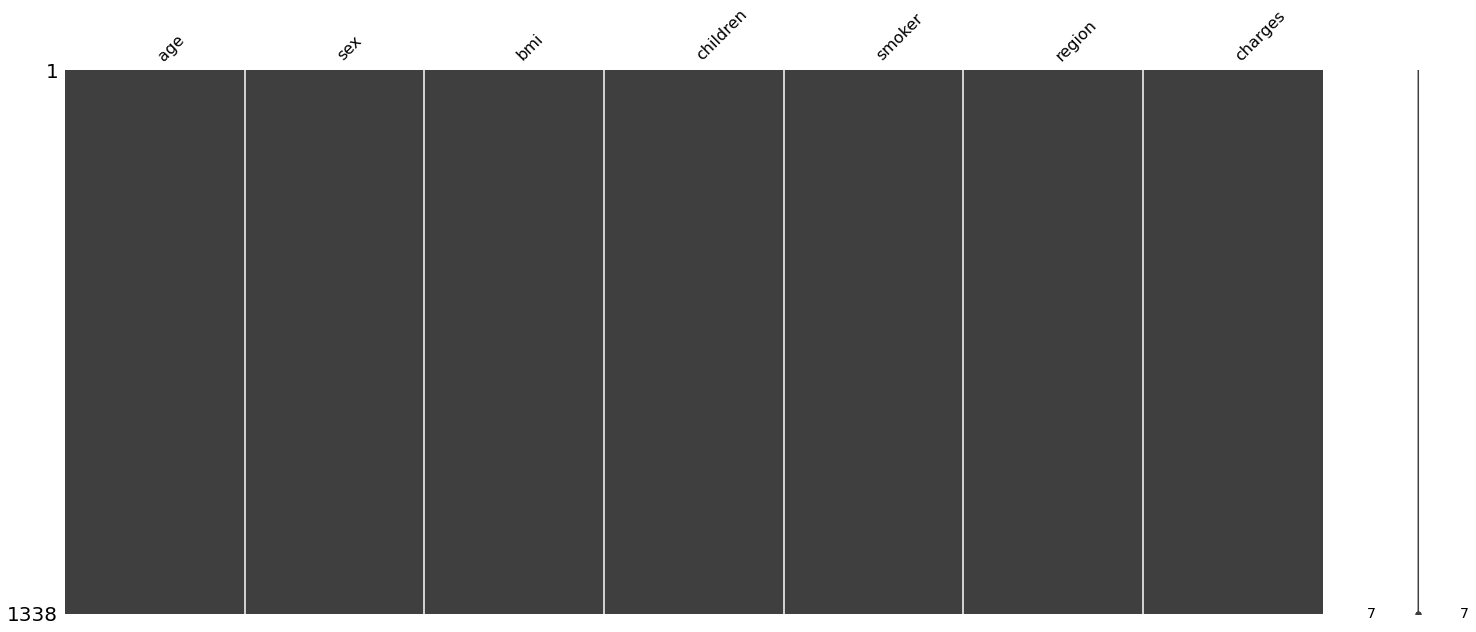

In [87]:
msno.matrix(insurance)


In [88]:
insurance['sex'].value_counts(dropna=False)


male      676
female    662
Name: sex, dtype: int64

In [89]:
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [90]:
dumm_insurance=pd.get_dummies(insurance['region'])

In [91]:
insurance['sex']=insurance['sex'].map(lambda x: 1 if x=='female' else 0)

In [92]:
insurance['smoker']=insurance['smoker'].map(lambda x: 1 if x=='yes' else 0)


In [93]:
df= pd.concat([insurance,dumm_insurance],axis=1)

In [94]:
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,southwest,2007.94500,0,0,0,1


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
target='charges'

In [97]:
cont=[col for col in df.columns if col not in [target,'region','southwest']]

In [98]:
cont

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'northeast',
 'northwest',
 'southeast']

In [99]:
df=df[cont+[target]].copy()

In [100]:
df.head(3)

,age,sex,bmi,children,smoker,northeast,northwest,southeast,charges
0,19,1,27.90,0,1,0,0,0,16884.9240
1,18,0,33.77,1,0,0,0,1,1725.5523
2,28,0,33.00,3,0,0,0,1,4449.4620


In [101]:
X=df[cont]
y=df[[target]]

In [102]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,19,1,27.900,0,1,0,0,0
1,18,0,33.770,1,0,0,0,1
2,28,0,33.000,3,0,0,0,1
3,33,0,22.705,0,0,0,1,0
4,32,0,28.880,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0
1334,18,1,31.920,0,0,1,0,0
1335,18,1,36.850,0,0,0,0,1
1336,21,1,25.800,0,0,0,0,0


In [103]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [105]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [107]:
sc_X=StandardScaler()

X_train_std=sc_X.fit_transform(X_train)

X_test_std=sc_X.transform(X_test)

## Regresión Lineal

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lr=LinearRegression()

In [110]:
lr.fit(X_train_std,y_train)

LinearRegression()

In [111]:
y_test

,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250
...,...
787,1917.31840
823,8219.20390
1,1725.55230
589,5976.83110


In [112]:
lr.predict(X_test_std)

array([[11015.74241852],
       [ 9500.84490047],
       [37956.97191777],
       [16108.87330766],
       [ 7025.39958707],
       [ 4218.12862892],
       [ 1827.92406235],
       [14363.98494116],
       [ 9061.87495132],
       [ 7506.25393651],
       [ 4884.28157924],
       [10346.79912395],
       [ 8696.46969369],
       [ 3848.10941965],
       [27793.47147473],
       [10787.10256953],
       [11285.21886753],
       [ 6263.00746298],
       [ 8234.13155098],
       [27209.55043213],
       [33591.30661179],
       [14337.91276455],
       [11927.65523358],
       [32054.26214914],
       [ 4075.71677507],
       [ 9358.60925085],
       [ 1428.91094474],
       [ 9825.78280014],
       [ 3806.0184153 ],
       [10409.76003389],
       [ 9074.71148498],
       [39822.39905321],
       [15431.06040808],
       [13624.36330551],
       [24978.59092119],
       [ 5394.35151802],
       [12508.07952242],
       [30461.69954157],
       [33456.53315165],
       [ 3512.5502838 ],


In [113]:
metricas(y_test,lr.predict(X_test_std))

El r2 score es 0.8216781468713605
El error cuadrático medio es 34577221.79775882
El error medio absoluto es 4252.759443161087


In [34]:
y_test

,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250
...,...
787,1917.31840
823,8219.20390
1,1725.55230
589,5976.83110


In [114]:
predicciones=y_test.copy()
predicciones['lr']=lr.predict(X_test_std)

In [115]:
predicciones.reset_index(drop=True,inplace=True)

In [116]:
predicciones

,charges,lr
0,9724.53000,11015.742419
1,8547.69130,9500.844900
2,45702.02235,37956.971918
3,12950.07120,16108.873308
4,9644.25250,7025.399587
...,...,...
129,1917.31840,5476.557031
130,8219.20390,9343.098558
131,1725.55230,3521.492556
132,5976.83110,7648.806297


<AxesSubplot:title={'center':'Regresion Lineal'}>

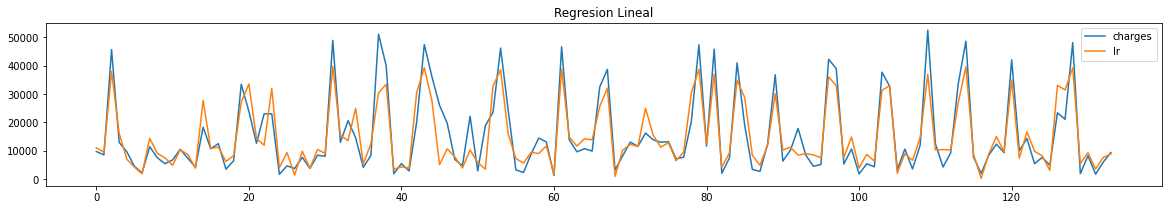

In [117]:
predicciones.plot(figsize=(20,3),title="Regresion Lineal")


## LASSO

In [118]:
from sklearn.linear_model import Lasso

In [121]:
lasso=Lasso()

In [120]:
lasso?

In [122]:
lasso.fit(X_train_std,y_train)

Lasso()

In [123]:
lasso.predict(X_test_std)

array([11018.58829364,  9502.65066987, 37949.82195707, 16106.12718775,
        7025.99207283,  4221.07299764,  1828.33891119, 14357.66127947,
        9057.77021432,  7504.50641783,  4883.19890998, 10343.82858491,
        8697.69053477,  3852.7224953 , 27792.03300405, 10787.42730916,
       11285.97313341,  6262.85423412,  8233.25400154, 27208.01368954,
       33587.859106  , 14332.75387591, 11925.10746338, 32054.29387221,
        4080.7950274 ,  9356.94292609,  1430.99519692,  9825.46388479,
        3810.38952322, 10408.19994027,  9070.87077482, 39819.89684794,
       15432.4063261 , 13626.11357789, 24977.14164247,  5393.71936693,
       12509.16219474, 30461.36920462, 33449.53970114,  3514.99324649,
        4291.33297379,  3960.99665682, 30634.10750031, 39311.29500641,
       27635.38020263,  5093.41520806, 10680.24180002,  7831.51910434,
        3908.55644926, 10285.971579  ,  5872.42679084,  3502.58242655,
       32801.04590698, 38564.3860023 , 15904.3268788 ,  7267.4147611 ,
      

In [124]:
metricas(y_test,lasso.predict(X_test_std))

El r2 score es 0.8216486454782694
El error cuadrático medio es 34582942.219537504
El error medio absoluto es 4252.9445377862


In [45]:
lasso.n_features_in_

8

In [46]:
lasso.coef_

array([3570.43137123,   28.5795501 , 1982.59206499,  553.44189063,
       9377.78936507,  466.71740074,  259.09712729,  -16.28113175])

In [125]:
predicciones['lasso']=lasso.predict(X_test_std)

<AxesSubplot:title={'center':'Regresion Lasso'}>

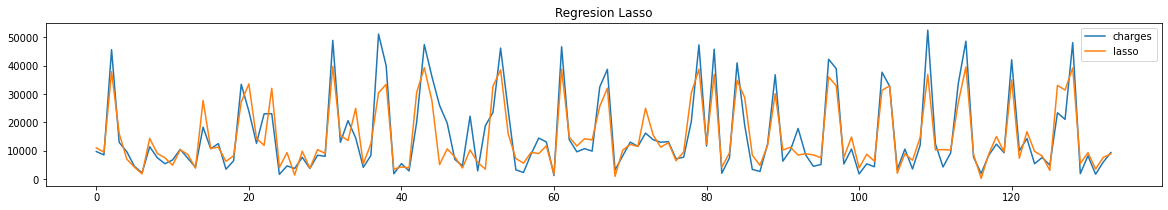

In [126]:
predicciones[['charges','lasso']].plot(figsize=(20,3),title="Regresion Lasso")


## Ridge

In [127]:
from sklearn.linear_model import Ridge

In [128]:
ridge=Ridge()

In [129]:
ridge.fit(X_train_std,y_train)

Ridge()

In [130]:
ridge.predict(X_test_std)

array([[11017.89782873],
       [ 9504.92338135],
       [37934.91267164],
       [16105.14984935],
       [ 7028.9885894 ],
       [ 4225.48700721],
       [ 1836.40060436],
       [14361.59057556],
       [ 9064.04765996],
       [ 7510.45225994],
       [ 4890.97050261],
       [10347.80699849],
       [ 8699.81281309],
       [ 3856.82689628],
       [27779.78694641],
       [10790.52498766],
       [11285.85757182],
       [ 6268.58278746],
       [ 8237.5753083 ],
       [27197.06058691],
       [33573.2700947 ],
       [14335.41036385],
       [11927.60896324],
       [32038.93077793],
       [ 4084.76361323],
       [ 9361.48768908],
       [ 1437.94129769],
       [ 9829.88699098],
       [ 3814.73584512],
       [10411.36165111],
       [ 9076.91081212],
       [39801.21562413],
       [15429.16938508],
       [13623.97932407],
       [24967.45737678],
       [ 5399.81835874],
       [12510.3814434 ],
       [30447.03566704],
       [33437.66189599],
       [ 3519.93432525],


In [131]:
metricas(y_test,ridge.predict(X_test_std))

El r2 score es 0.8215376397403856
El error cuadrático medio es 34604466.61462589
El error medio absoluto es 4254.979179135932


In [132]:
predicciones['ridge']=ridge.predict(X_test_std)

<AxesSubplot:title={'center':'Regresion de Cresta'}>

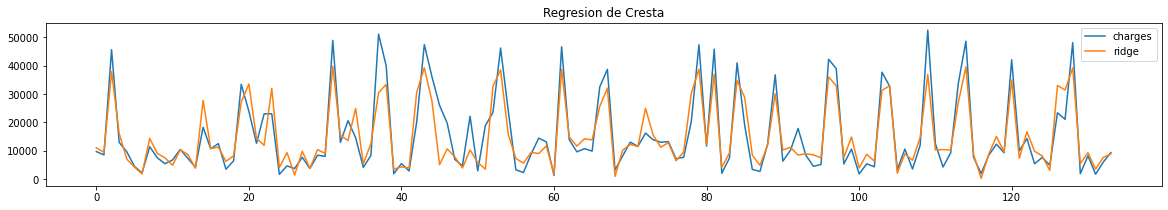

In [133]:
predicciones[['charges','ridge']].plot(figsize=(20,3),title="Regresion de Cresta")

## Elastic Net

In [134]:
from sklearn.linear_model import ElasticNet


In [135]:
elastic=ElasticNet(alpha=.5)

In [136]:
elastic.fit(X_train_std,y_train)

ElasticNet(alpha=0.5)

In [137]:
elastic.predict(X_test_std)

array([11505.38680112, 10431.52155118, 32719.10780574, 15268.174786  ,
        7926.15577876,  5972.32147625,  3903.93964369, 13846.14653323,
        9628.10412005,  8527.02178812,  6477.70135874, 10629.53601245,
        9509.00720562,  5893.2557105 , 24560.64178985, 11536.37389564,
       11455.46364969,  7610.38199379,  9077.00956423, 24242.20426402,
       29277.30929487, 13795.99136934, 11959.7564942 , 28346.37725195,
        6191.70304109, 10069.43075121,  3611.55465649, 10754.1684586 ,
        5855.4432434 , 10811.60988897,  9642.80711566, 34694.87973104,
       14975.10002345, 13531.93581137, 22345.24571857,  6748.60402217,
       12989.50683963, 26951.72750366, 29002.00478449,  5320.54837151,
        5890.1597614 ,  6112.20985395, 26991.96914103, 33817.14268646,
       24790.01360689,  6415.83628948, 11451.63916685,  8726.78293034,
        5615.85012427, 11072.50244023,  7111.83016481,  5195.19940293,
       28844.80641669, 33269.21312393, 15474.89489445,  8367.54559103,
      

In [138]:
metricas(y_test,elastic.predict(X_test_std))

El r2 score es 0.7597692011841287
El error cuadrático medio es 46581579.697452605
El error medio absoluto es 4994.511167989137


In [139]:
predicciones['elastic']=elastic.predict(X_test_std)

<AxesSubplot:title={'center':'Regresion Elastic'}>

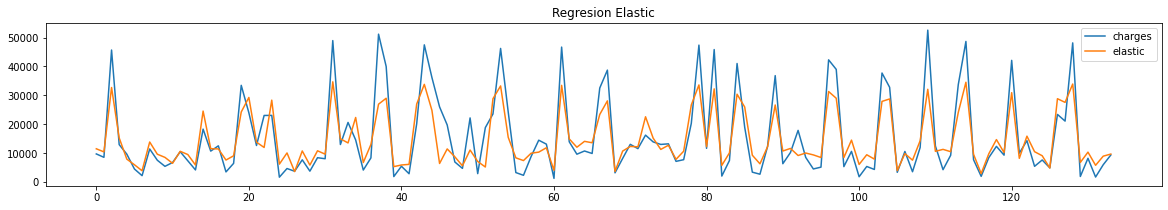

In [140]:
predicciones[['charges','elastic']].plot(figsize=(20,3),title="Regresion Elastic")


## LARS  

In [141]:
from sklearn.linear_model import Lars

In [142]:
lars=Lars()

In [143]:
lars.fit(X_train_std,y_train)

Lars()

In [144]:
lars.predict(X_test_std)

array([11015.74241852,  9500.84490047, 37956.97191777, 16108.87330766,
        7025.39958707,  4218.12862892,  1827.92406235, 14363.98494116,
        9061.87495132,  7506.25393651,  4884.28157924, 10346.79912395,
        8696.46969369,  3848.10941965, 27793.47147473, 10787.10256953,
       11285.21886753,  6263.00746298,  8234.13155098, 27209.55043213,
       33591.30661179, 14337.91276455, 11927.65523358, 32054.26214914,
        4075.71677507,  9358.60925085,  1428.91094474,  9825.78280014,
        3806.0184153 , 10409.76003389,  9074.71148498, 39822.39905321,
       15431.06040808, 13624.36330551, 24978.59092119,  5394.35151802,
       12508.07952242, 30461.69954157, 33456.53315165,  3512.5502838 ,
        4290.31151379,  3954.86930897, 30635.62744125, 39318.10278656,
       27635.98565158,  5096.39546015, 10679.836177  ,  7831.08447883,
        3908.5290758 , 10283.38734898,  5874.37887424,  3505.0973271 ,
       32800.40266346, 38573.77413439, 15905.38417016,  7267.59093391,
      

In [145]:
metricas(y_test,lars.predict(X_test_std))

El r2 score es 0.8216781468713612
El error cuadrático medio es 34577221.7977587
El error medio absoluto es 4252.759443161075


In [146]:
predicciones['lars']=lars.predict(X_test_std)

<AxesSubplot:title={'center':'Regresion Lars'}>

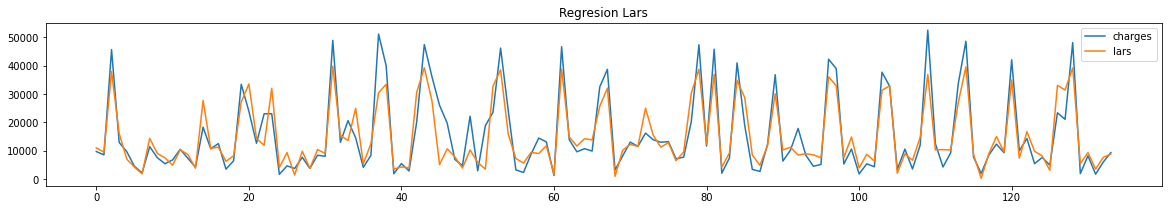

In [147]:
predicciones[['charges','lars']].plot(figsize=(20,3),title="Regresion Lars")

## Regresión Bayesiana

In [70]:
from sklearn.linear_model import BayesianRidge

In [148]:
bayesian_ridge=BayesianRidge()

In [149]:
y_train

,charges
461,22144.0320
322,35491.6400
224,19515.5416
711,10107.2206
58,23244.7902
...,...
763,3070.8087
835,7160.3303
1216,5415.6612
559,1646.4297


In [150]:
bayesian_ridge.fit(X_train_std,y_train[target])

BayesianRidge()

In [151]:
bayesian_ridge.predict(X_test_std)

array([11021.80412795,  9512.31579935, 37894.91162091, 16098.40186049,
        7035.50047878,  4238.83080699,  1851.77727256, 14357.25334788,
        9067.99199386,  7518.06750495,  4903.10010634, 10349.63823974,
        8705.87649731,  3872.63251139, 27754.97338753, 10796.7254181 ,
       11287.01705003,  6278.69519021,  8243.82225466, 27174.41205597,
       33540.56033901, 14330.87723966, 11927.52890198, 32011.12344402,
        4101.1662436 ,  9366.71014802,  1454.31964205,  9837.32547467,
        3830.54181761, 10414.26782183,  9080.90295487, 39762.79418331,
       15425.73958966, 13623.28287468, 24947.2689607 ,  5409.73671994,
       12514.5502409 , 30420.44237189, 33403.44389786,  3533.32907472,
        4308.83892857,  3981.00278809, 30592.75489266, 39253.10124557,
       27602.57983486,  5111.09334281, 10689.7330646 ,  7841.38071748,
        3928.34877879, 10293.39515361,  5888.16245005,  3524.39195353,
       32754.24290263, 38511.08312398, 15900.44418506,  7280.18082777,
      

In [152]:
metricas(y_test,bayesian_ridge.predict(X_test_std))

El r2 score es 0.8212802958850786
El error cuadrático medio es 34654366.474946566
El error medio absoluto es 4259.0048352950425


In [153]:
predicciones['bayesiana']=bayesian_ridge.predict(X_test_std)

<AxesSubplot:title={'center':'Regresion Bayesiana'}>

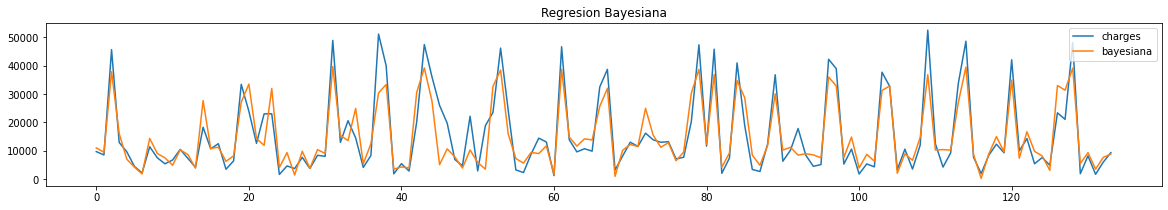

In [154]:
predicciones[['charges','bayesiana']].plot(figsize=(20,3),title="Regresion Bayesiana")

<AxesSubplot:title={'center':'Desempeño Modelos'}>

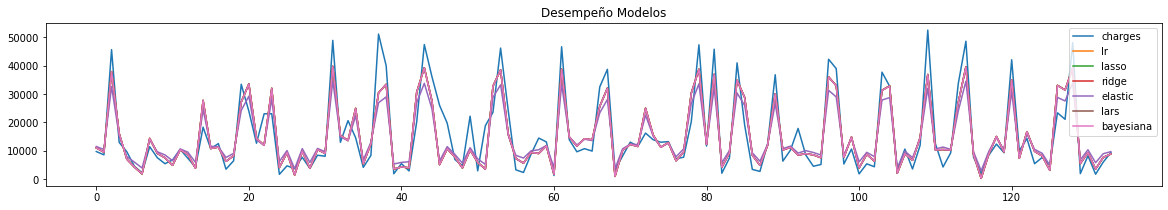

In [155]:
predicciones.plot(figsize=(20,3),title="Desempeño Modelos")

In [156]:
lr

LinearRegression()

In [157]:
pd.to_pickle(lr,'Modelo_rl.pkl')

In [158]:
modelo=pd.read_pickle('Modelo_rl.pkl')

In [159]:
modelo.predict(X_train)

array([[231902.18599632],
       [204919.88896866],
       [221250.89259209],
       ...,
       [205602.52989384],
       [151618.47664582],
       [168149.52804588]])

In [162]:
pd.to_pickle(sc_X,'standard_insurance.pkl')

In [163]:
scalador=pd.read_pickle('standard_insurance.pkl')
